In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
df = pd.read_csv('data/Covid_Deaths.csv')

df.dropna(subset=['COVID_deaths', 'crude_COVID_rate'], inplace=True)

# Feature Selection
features = ['jurisdiction_residence', 'year', 'month', 'group', 'subgroup1', 'subgroup2']
target = 'crude_COVID_rate'

# Select features and target
X = df[features]
y = df[target]

# One-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['jurisdiction_residence', 'group', 'subgroup1', 'subgroup2'], drop_first=True)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Standardize features for PCA and regression models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

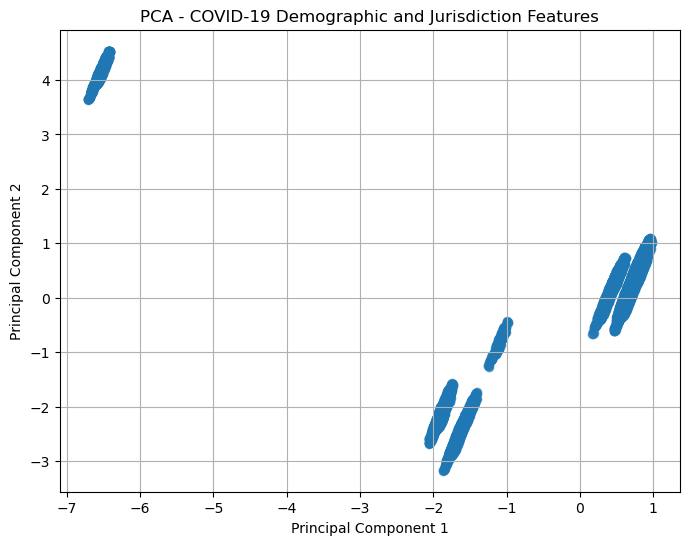

Linear Regression: RMSE = 25.64, R² = 0.27
Ridge Regression: RMSE = 25.64, R² = 0.27
Lasso Regression: RMSE = 25.65, R² = 0.27


In [6]:
# PCA Analysis (Dimensionality Reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# PCA Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.6)
plt.title('PCA - COVID-19 Demographic and Jurisdiction Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Regression Models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1)
}

# Train and evaluate regression models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    print(f'{name}: RMSE = {rmse:.2f}, R² = {r2:.2f}')